CSCE 5214 asignment 2

Author: Thai Ha Dang

Student ID: 11741833

# Task 1 - Supervised Machine Learning Model (Logistics Regression).

## 1. Combine the three datasets into one large dataset.

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from assignment_1_updated_code import *     # import the functions from the provided read CAN log file code
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
# load data from files
fff_injection_path = "CAN Bus log/CAN Bus log - injection of FFF as the speed reading.log"
rpm_injection_path = "CAN Bus log/CAN Bus log - injection of RPM readings.log"
no_injection_path = "CAN Bus log/CAN bus log - no injection of messages.log"

fff_injection_df = dict_to_df(getData(fff_injection_path))
rpm_injection_df = dict_to_df(getData(rpm_injection_path))
no_injection_df = dict_to_df(getData(no_injection_path))

d:\DOC\UNT\Spring_2025\CSCE_5214\CSCE5214_Assignment_2_DTH\assignment_1_updated_code.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[626. 624. 624. ... 900. 906. 906.]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[df['RPM'] == 1, 'RPM'] = df['value']
d:\DOC\UNT\Spring_2025\CSCE_5214\CSCE5214_Assignment_2_DTH\assignment_1_updated_code.py:49: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 0.          0.          0.         ... 25.44515023 25.44515023
 25.44515023]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[df['Speed'] == 1, 'Speed'] = df['value']
d:\DOC\UNT\Spring_2025\CSCE_5214\CSCE5214_Assignment_2_DTH\assignment_1_updated_code.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise

In [3]:
print(fff_injection_df.shape, rpm_injection_df.shape, no_injection_df.shape)

(14435, 3) (4543, 3) (1649, 3)


In [4]:
df = pd.concat([fff_injection_df, rpm_injection_df, no_injection_df], ignore_index=True)
print(df.shape)
print(df.head())

(20627, 3)
     RPM  Speed  attack
0  626.0  False       0
1  False    0.0       0
2  624.0  False       0
3  False    0.0       0
4  624.0  False       0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20627 entries, 0 to 20626
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   RPM     20627 non-null  object
 1   Speed   20627 non-null  object
 2   attack  20627 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 483.6+ KB


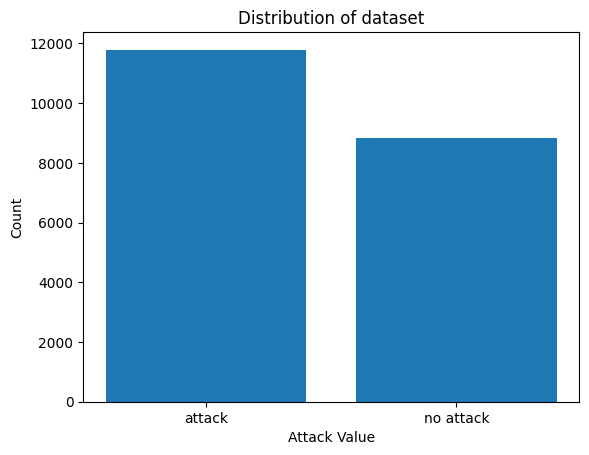

In [6]:
# visualise the distribution of the attack classes
attack_counts = df['attack'].value_counts()
classes = attack_counts.index
counts = attack_counts.values
class_names = ['attack', 'no attack']

# Plot a bar chart
plt.bar(class_names, counts)
plt.title("Distribution of dataset")
plt.xlabel("Attack Value")
plt.ylabel("Count")
plt.savefig('distribution_of_dataset.png')
plt.show()

## 2. Split the datasets into two sets: 3/4 as the training dataset and 1/4 as the testing dataset.

In [7]:
# Replace 'False' with 0 in the 'RPM' and 'Speed' columns
df['RPM'] = df['RPM'].replace('False', -999)
df['Speed'] = df['Speed'].replace('False', -999)


df['RPM'] = pd.to_numeric(df['RPM'], errors='coerce')
df['Speed'] = pd.to_numeric(df['Speed'], errors='coerce')

# Replace missing values (NaNs) with zero
df['RPM'].fillna(0, inplace=True)
df['Speed'].fillna(0, inplace=True)

# Ensure 'attack' is integer
df['attack'] = df['attack'].astype(int)

# Final check
print(df.head())
print(df.info())

     RPM  Speed  attack
0  626.0    0.0       0
1    0.0    0.0       0
2  624.0    0.0       0
3    0.0    0.0       0
4  624.0    0.0       0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20627 entries, 0 to 20626
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RPM     20627 non-null  float64
 1   Speed   20627 non-null  float64
 2   attack  20627 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 483.6 KB
None


C:\Users\hadan\AppData\Local\Temp\ipykernel_20652\2382408328.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RPM'].fillna(0, inplace=True)
C:\Users\hadan\AppData\Local\Temp\ipykernel_20652\2382408328.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when do

In [8]:
# Split the data into features and target
# Features (X) and Target (y)
X = df[['RPM', 'Speed']]  # or whichever features you want
y = df['attack']

# 75% train, 25% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25, 
    random_state=42,  # for reproducibility
    stratify=y        # helps keep the same proportion of 0/1 in train and test 
)

print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)


Train set size: (15470, 2)
Test set size: (5157, 2)


## 3. Train your choice of ML model on the training dataset.

In [9]:
# Build Logistic Regression model
class Logistic_Regression_model:
    def __init__(self, learning_rate=0.01, max_iter=1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Initialize weights and bias
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient Descent
        for _ in range(self.max_iter):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)
            
            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            # Update weights
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)

In [10]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression from scratch
logistics_model = Logistic_Regression_model(learning_rate=0.1, max_iter=1000)
logistics_model.fit(X_train, y_train)

In [11]:
# Evaluate the model
y_pred_lr = logistics_model.predict(X_test)
results = confusion_matrix(y_test, y_pred_lr)

print('The accuracy of the logistics model is:', accuracy_score(y_test, y_pred_lr))
print('The precision of the logistics model is:', results[0][0] / (results[0][0] + results[0][1]))
print('The recall of the logistics model is:', results[0][0] / (results[0][0] + results[1][0]))
print('The f1-score of the logistics model is:', 2 * ((results[0][0] / (results[0][0] + results[0][1])) * (results[0][0] / (results[0][0] + results[1][0]))) / ((results[0][0] / (results[0][0] + results[0][1])) + (results[0][0] / (results[0][0] + results[1][0]))))
print('The confusion matrix of the logistics model is:', results)


The accuracy of the logistics model is: 0.9901105293775451
The precision of the logistics model is: 0.9769126301493889
The recall of the logistics model is: 1.0
The f1-score of the logistics model is: 0.9883215021754065
The confusion matrix of the logistics model is: [[2158   51]
 [   0 2948]]


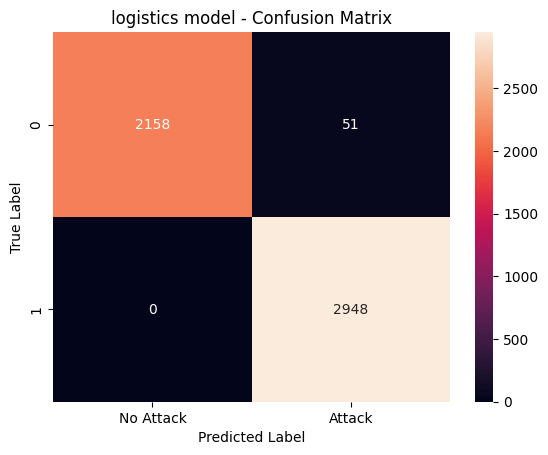

In [12]:
# plot the confusion matrix
import seaborn as sns
sns.heatmap(results, annot=True, fmt='d')
plt.title("logistics model - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
classes = ['No Attack', 'Attack']
plt.xticks([0.5, 1.5], classes)
plt.savefig('confusion_matrix_logistics model.png')
plt.show()

Analysis: The Logistic Regression model achieved an accuracy of 99.01%, with a precision of 97.69%, recall of 100%, and F1-score of 98.83% for the attack class.

The confusion matrix indicates 2158 true negatives, 2948 true positives, and 51 false positives, with no false negatives. This means the model detected every attack correctly but misclassified 51 non-attack instances as attacks. The high recall is critical for vehicle security, ensuring no attacks are missed, while the slightly lower precision reflects a small trade-off in false positives. Despite its linear nature, Logistic Regression performed remarkably well, suggesting the data may have a strong linear separation between classes.

# Task 2. Second Choice of ML model (Random Forest)

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model from sklearn library
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

In [14]:
# 4. Evaluate the model
results_rf = confusion_matrix(y_test, y_pred_rf)

print('The accuracy of the Random Forest is:', accuracy_score(y_test, y_pred_rf))
print('The precision of the Random Forest is:', results_rf[0][0] / (results_rf[0][0] + results_rf[0][1]))
print('The recall of the Random Forest is:', results_rf[0][0] / (results_rf[0][0] + results_rf[1][0]))
print('The f1-score of the Random Forestl is:', 2 * ((results_rf[0][0] / (results_rf[0][0] + results_rf[0][1])) * (results_rf[0][0] / (results_rf[0][0] + results_rf[1][0]))) / ((results_rf[0][0] / (results_rf[0][0] + results_rf[0][1])) + (results_rf[0][0] / (results_rf[0][0] + results_rf[1][0]))))
print('Confusion matric',confusion_matrix(y_test, y_pred_rf))



The accuracy of the Random Forest is: 1.0
The precision of the Random Forest is: 1.0
The recall of the Random Forest is: 1.0
The f1-score of the Random Forestl is: 1.0
Confusion matric [[2209    0]
 [   0 2948]]


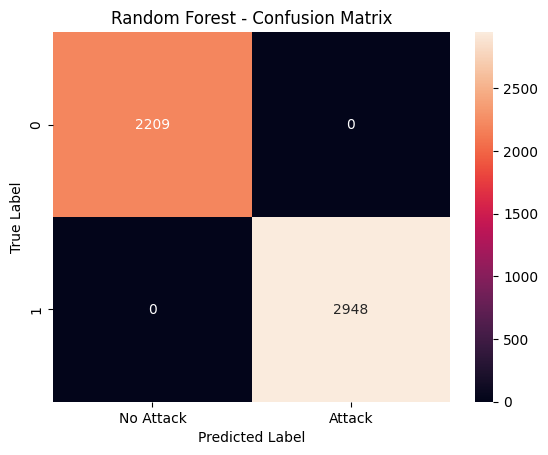

In [15]:
# plot the confusion matrix
import seaborn as sns
sns.heatmap(results_rf, annot=True, fmt='d')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
classes = ['No Attack', 'Attack']
plt.xticks([0.5, 1.5], classes)
plt.savefig('confusion_matrix_rf.png')
plt.show()


In [16]:
# Analyse the feature importance
feature_importances = rf_model.feature_importances_
print("Feature Importances:", feature_importances)


Feature Importances: [0.42596569 0.57403431]


The Random Forest model achieved perfect performance with an accuracy, precision, recall, and F1-score of 1.0. 
The confusion matrix shows 2209 true negatives and 2948 true positives, with no false positives or false negatives, indicating flawless classification of all test instances. 
Feature importances reveal that Speed (57.40%) contributes more to the model’s decisions than RPM (42.60%), suggesting Speed is a stronger indicator of attacks in this dataset. 
This aligns with the model’s ability to capture non-linear relationships, leveraging Speed’s higher importance to distinguish attack from non-attack states. However, such perfect results may indicate overfitting or a dataset with overly distinct class boundaries, necessitating further scrutiny of the data’s complexity and representativeness.

# Task 3 - Compare and contrast models trained  in tasks 1 and 2 

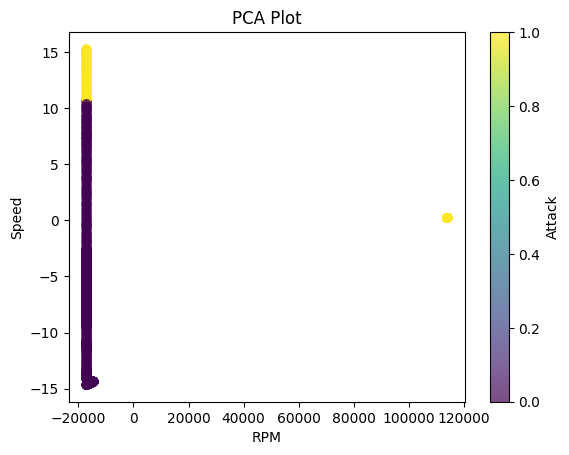

In [17]:
# PCA plot 
from sklearn.decomposition import PCA

# Suppose X is just the numeric columns [RPM, Speed]
X = df[['RPM', 'Speed']]
y = df['attack']

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# X_pca is now an array of shape (num_samples, 2)
pc1 = X_pca[:, 0]  # principal component 1
pc2 = X_pca[:, 1]  # principal component 2

# Plot the two principal components
plt.scatter(pc1, pc2, c=y, alpha=0.7)
plt.xlabel("RPM")
plt.ylabel("Speed")
plt.title("PCA Plot")
plt.colorbar(label='Attack')
plt.savefig('PCA_plot.png')
plt.show()


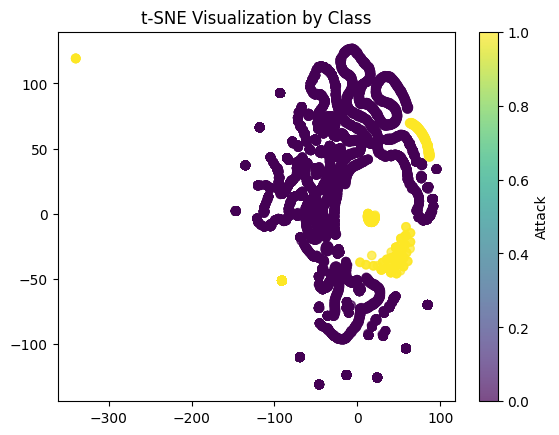

In [18]:
# T-SNE plot
from sklearn.manifold import TSNE
from sklearn.manifold import TSNE
# Initialize t-SNE for 2 components
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Extract the two t-SNE dimensions
tsne_dim1 = X_tsne[:, 0]
tsne_dim2 = X_tsne[:, 1]

# Plot
plt.scatter(tsne_dim1, tsne_dim2, c=y, alpha=0.7)
plt.title("t-SNE Visualization by Class")
plt.colorbar(label='Attack')
plt.savefig('t-SNE_plot.png')
plt.show()

The models’ performance metrics and confusion matrices were compared:
- Logistic Regression FNR: 0 / (0 + 2948) = 0.0 (0% of attacks missed)
- Random Forest FNR: 0 / (0 + 2948) = 0.0 (0% of attacks missed)

Both models achieved a False Negative Rate (FNR) of 0, detecting all attacks perfectly. Random Forest outperforms Logistic Regression overall with an accuracy of 100% versus 99.01%, precision of 100% versus 97.69%, and F1-score of 100% versus 98.83%. The primary difference is in false positives: Random Forest had none, while Logistic Regression had 51, impacting its precision and overall accuracy.

# Task 4 - Discussion
- Limitations
Supervised machine learning relies on labeled data, which may not encompass rare or emerging attack types (e.g., zero-day attacks), limiting generalizability. The perfect (Random Forest) and near-perfect (Logistic Regression) results suggest the dataset may lack sufficient complexity or variability, potentially not mirroring real-world vehicle attack scenarios. The reliance on only RPM and Speed, despite Speed’s higher importance in Random Forest, may exclude other relevant indicators like network signals or temporal patterns.

- Improvements
Feature engineering, such as adding Speed or RPM rate-of-change metrics, could enhance model robustness, especially given Speed’s dominant role (57.40%) in Random Forest. Cross-validation could confirm whether Random Forest’s perfection reflects overfitting, and hyperparameter tuning (e.g., tree depth) might refine its performance further. If the dataset is imbalanced, techniques like SMOTE could be explored, though the current results suggest strong class separability.

- Alternative Solutions/Suggestions
Unsupervised anomaly detection could complement these models by identifying novel attacks without labeled data, leveraging Speed’s importance as a key anomaly indicator. A hybrid system with real-time monitoring could adapt to dynamic threats. If additional data (e.g., time-series or CAN bus signals) were available, deep learning models like LSTMs might capture temporal dependencies, potentially outperforming the current feature-limited approach.